In [1]:
# Libraries
library('ggplot2')
library(grid)
library(tidyverse)

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [33]:
df = read.csv('Results/Lasso.csv')
nulls = read.csv('Results/Null_Results_Lasso.csv')

In [34]:
df$iter = 200
df$type = 'actual'
nulls$type = 'nulls'

In [47]:
nulls = nulls %>% select(-'Unnamed..0')

In [48]:
combined <- rbind(df,nulls)

In [8]:
options(repr.plot.width = 15, repr.plot.height = 7)

plot_theme = theme(panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5,size=20),
        plot.margin = unit(c(1,3,1,1), "lines"),
        axis.line = element_line(),
        axis.title = element_text(size=16),
        axis.text = element_text(size=14))

In [51]:
p = ggplot(df,aes(x=year, y = mean_acc)) + 
    geom_line(color='#efaf00',size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='black',linetype=2) +
    plot_theme +
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) +
    ylim(0.5,0.7) +
ggtitle('Agenda Polarization 1983-2016 (Speeches)') + 
  xlab('Year') + 
  ylab('Average 10-Fold Prediction Accuracy')


ggsave('Results/Figures/Speech_acc_main_fig2.1.png',p,width=15,height=7)


In [52]:
p = ggplot(df,aes(x=year, y = speaker_acc)) + 
    geom_line(color='#518ef7',size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='black',linetype=2) +
    plot_theme +
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) +
    ylim(0.5,0.9) +
ggtitle('Agenda Polarization 1983-2016 (Representative)') + 
  xlab('Year') + 
  ylab('Average 10-Fold Prediction Accuracy')


ggsave('Results/Figures/Speaker_acc_main_fig2.2.png',p,width=15,height=7)


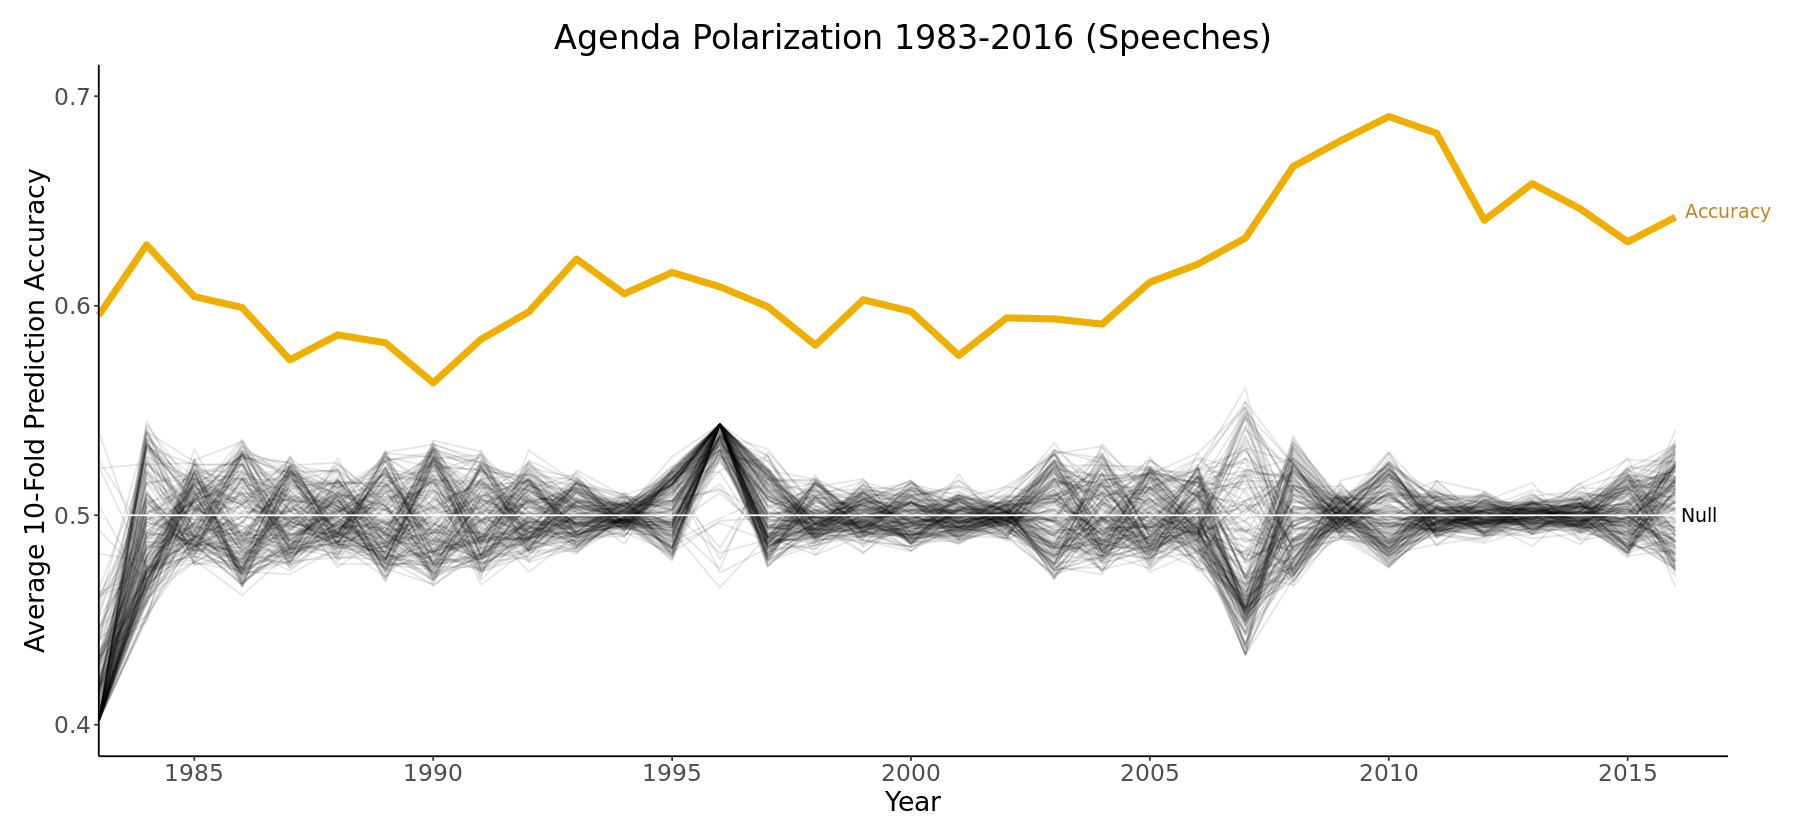

In [56]:

p = ggplot(combined,aes(x = year, y = mean_acc)) + 
  geom_line(data=combined[combined$type == "actual",],color='#efaf00',aes(group=iter),size=2) + 
  geom_line(data=combined[combined$type != "actual",],aes(group=iter),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  plot_theme +
  scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) +
  ylim(0.4,0.7) +
  annotate('text',label='Accuracy',x=2017.1,y=0.645,size=4,color='#c18422') +
  annotate('text',label='Null',x=2016.5,y=0.50,size=4,color='black') + 
  ggtitle('Agenda Polarization 1983-2016 (Speeches)') + 
  xlab('Year') + 
  ylab('Average 10-Fold Prediction Accuracy')


gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave('Results/Figures/Speech_acc_withnull_supp2.1.png',gt,width=15,height=7)


Warning message:
“Removed 139 row(s) containing missing values (geom_path).”


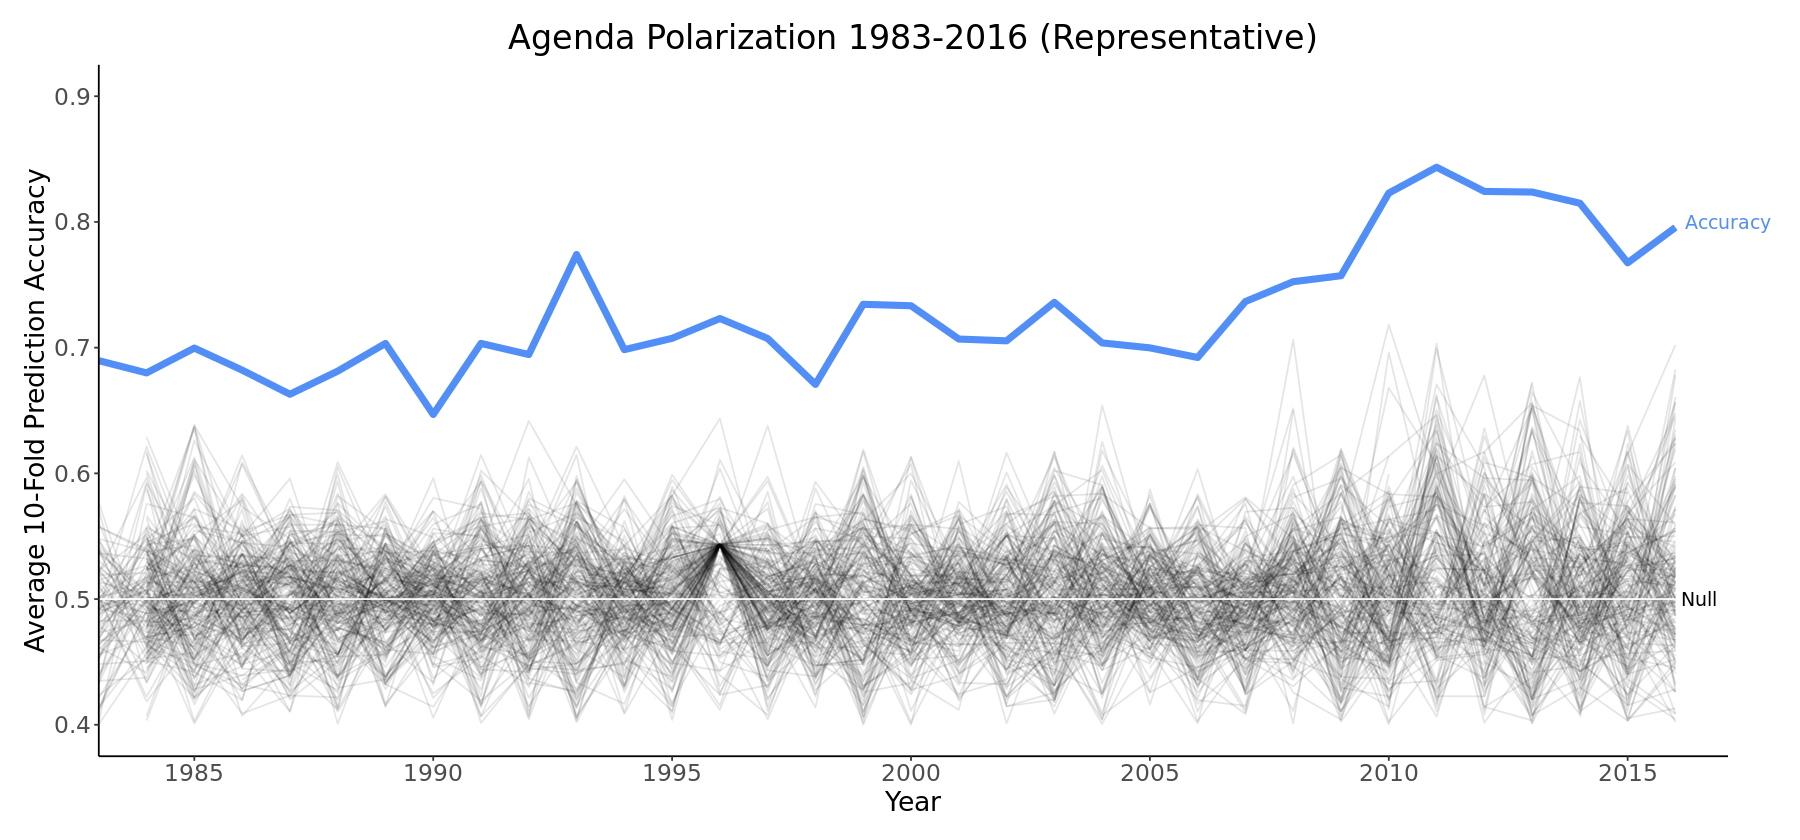

In [58]:
options(repr.plot.width = 15, repr.plot.height = 7)

p = ggplot(combined,aes(x = year, y = speaker_acc)) + 
  geom_line(data=combined[combined$type == "actual",],color='#518ef7',aes(group=iter),size=2) + 
  geom_line(data=combined[combined$type != "actual",],aes(group=iter),alpha=0.1,size=0.5) + 
  annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='white') +
  plot_theme + 
  scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) +
  ylim(0.4,.9) +
  annotate('text',label='Accuracy',x=2017.1,y=0.8,size=4,color='#518ef7') +
  annotate('text',label='Null',x=2016.5,y=0.50,size=4,color='black') +
  ggtitle('Agenda Polarization 1983-2016 (Representative)') + 
  xlab('Year') + 
  ylab('Average 10-Fold Prediction Accuracy')

gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave('Results/Figures/Speaker_acc_withnull_supp2.2.png',gt,width=15,height=7)


In [60]:
mean_pred <- df %>%
    select(year,Dem_speaker_mean,Rep_speaaker_mean) %>%
    rename(Dem = Dem_speaker_mean,Rep=Rep_speaaker_mean) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'mean')

std_pred <- df %>%
    select(year,Dem_speaker_std,Rep_speaker_std) %>%
    rename(Dem = Dem_speaker_std,Rep=Rep_speaker_std) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'std')

p = mean_pred %>% 
    merge(std_pred,on=c(year,Party)) %>%
    ggplot(aes(x = year, y=mean, color=Party)) +
    geom_point(size=3) + 
    geom_line() + 
    geom_errorbar(aes(ymin=mean-std,ymax=mean+std,width=0.5)) + 
    plot_theme + 
    theme(legend.position = 'None') + 
    scale_color_manual(values=c('blue','red')) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='black') + 
    ylab('Average Estimated Probability of Democrat') + 
    ggtitle('House Representative Probability of Democrat 1983-2016') + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5))

ggsave('Results/Figures/Speaker_estimates_supp2.3.png',p,width=15,height=7)


## Supplementals

#### SVC results

In [62]:
svc = read.csv('Results/SVC.csv')

In [65]:
svc = svc %>% select(-'Unnamed..0')

In [67]:
svc$model = 'SVC'
df$model = 'LASSO'

gt = df %>%
select(-iter,-type) %>%
rbind(svc) %>%
    ggplot(aes(x = year, y = mean_acc,linetype=model)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    plot_theme + 
    theme(legend.text = element_text(size=14)) + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    ggtitle('Agenda Polarization 1983-2016 (Speeches)') + 
    xlab('Year') + 
    ylab('Average 10-Fold Prediction Accuracy')

ggsave('Results/Figures/Speech_acc_withSVC_supp2.3.png',gt,width=15,height=7)


In [69]:
gt = df %>%
    select(-iter,-type) %>%
    rbind(svc) %>%
    ggplot(aes(x = year, y = speaker_acc,linetype=model)) + 
    geom_line(size=2) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    plot_theme + 
    theme(legend.text = element_text(size=14)) + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    ggtitle('Agenda Polarization 1983-2016 (Representatives)') + 
    xlab('Year') + 
    ylab('Average 10-Fold Prediction Accuracy')

ggsave('Results/Figures/Speaker_acc_withSVC_supp2.4.png',gt,width=15,height=7)


### Different k models

In [72]:
mods = mods %>% select(-'Unnamed..0',-'Unnamed..0.1')

In [82]:
dim(df)

[1] 34 16

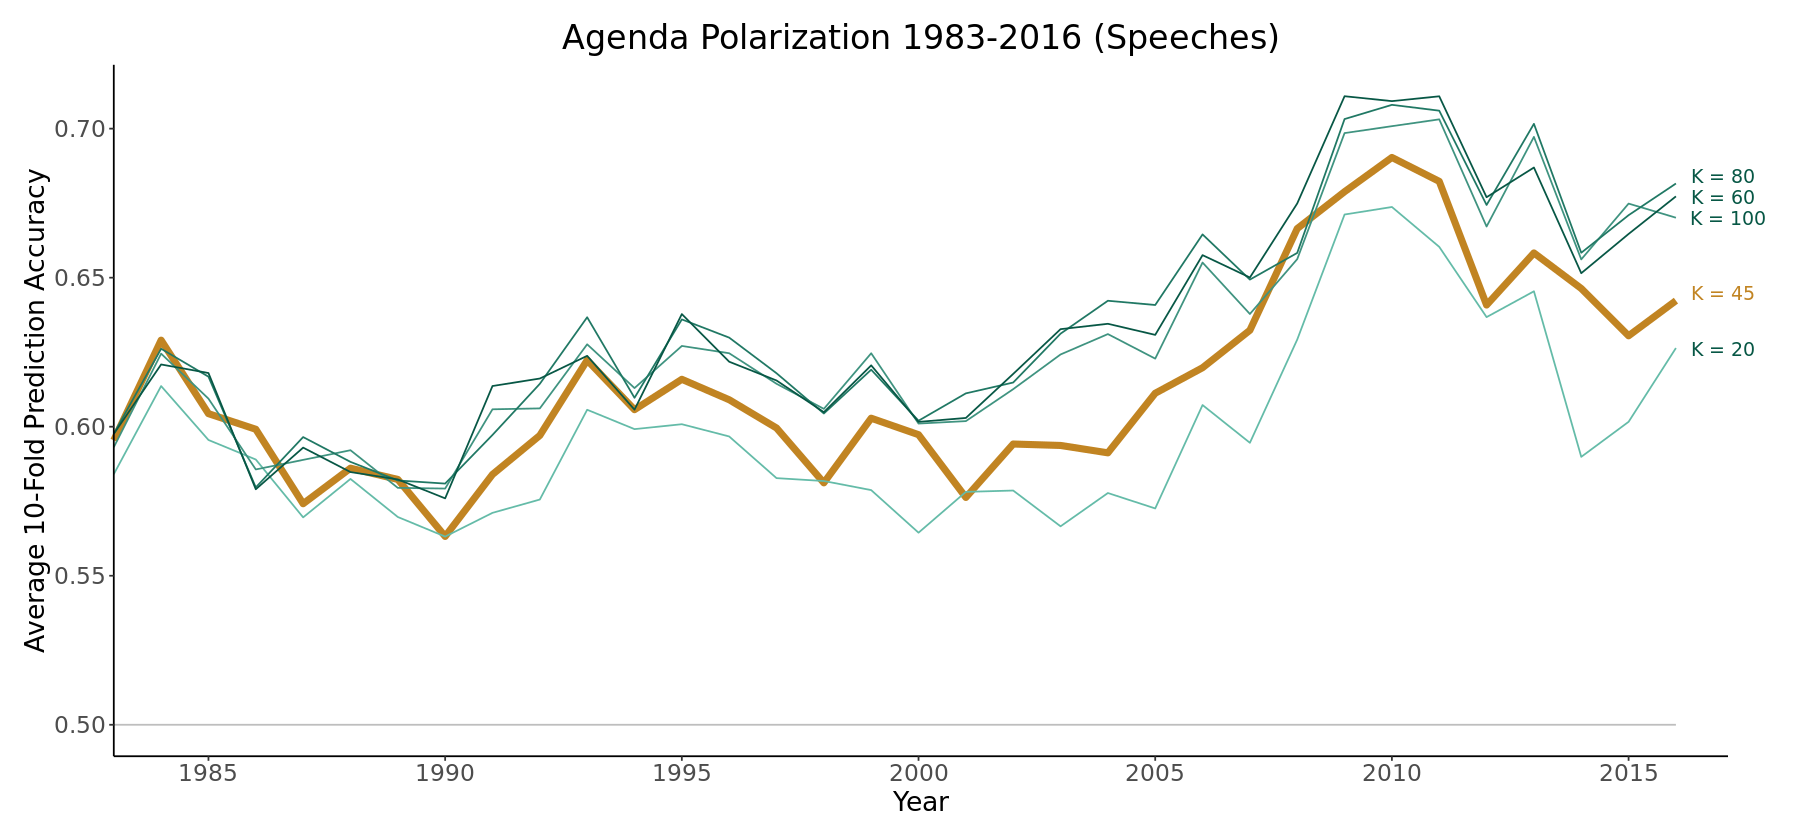

In [106]:
mods <- read.csv('Results/Robustness.csv')
df$k = 45
mods <- read.csv('Results/Robustness.csv')
mods = mods %>%
    select(-'Unnamed..0',-'Unnamed..0.1') %>%
    mutate(type='other',iter=1,model='LASSO') %>%
    subset(k != 45) %>%
    rbind(df)

p <- mods %>%
    mutate(k = case_when(k == 45 ~ "k = 45",
                         k == 20 ~ 'k = 20',
                         k == 60 ~ 'k = 60',
                         k == 80 ~ 'k = 80',
                         k == 100 ~ 'k = 100'),
           k = factor(k,levels=c('k = 20','k = 45','k = 60','k = 80','k = 100')),
          type=ifelse(k == 'k = 45','a','b')) %>%
    ggplot(aes(x = year, y = mean_acc, color=k)) + 
    geom_line(aes(size=type)) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    plot_theme + 
    theme(legend.position = 'None') + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    scale_size_manual(values=c(2,0.5)) + 
    scale_color_manual(values=c('#64bba8','#c18422','#3f9380','#207864','#075745')) + 
    annotate('text',label='K = 45',x=2017,y=0.645,size=4,color='#c18422') +
    annotate('text',label='K = 20',x=2017,y=0.626,size=4,color='#075745') +
    annotate('text',label='K = 60',x=2017,y=0.677,size=4,color='#075745') +
    annotate('text',label='K = 80',x=2017,y=0.684,size=4,color='#075745') +
    annotate('text',label='K = 100',x=2017.1,y=0.67,size=4,color='#075745') +
    ggtitle('Agenda Polarization 1983-2016 (Speeches)') + 
      xlab('Year') + 
      ylab('Average 10-Fold Prediction Accuracy')

gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave('Results/Figures/Speech_acc_withDiffK_supp2.4.png',gt,width=15,height=7)


In [107]:
mods %>%
    group_by(k) %>%
    summarise(x = last(speaker_acc))

k,x
<dbl>,<dbl>
20,0.7782609
45,0.7956522
60,0.8108696
80,0.8434783
100,0.8347826


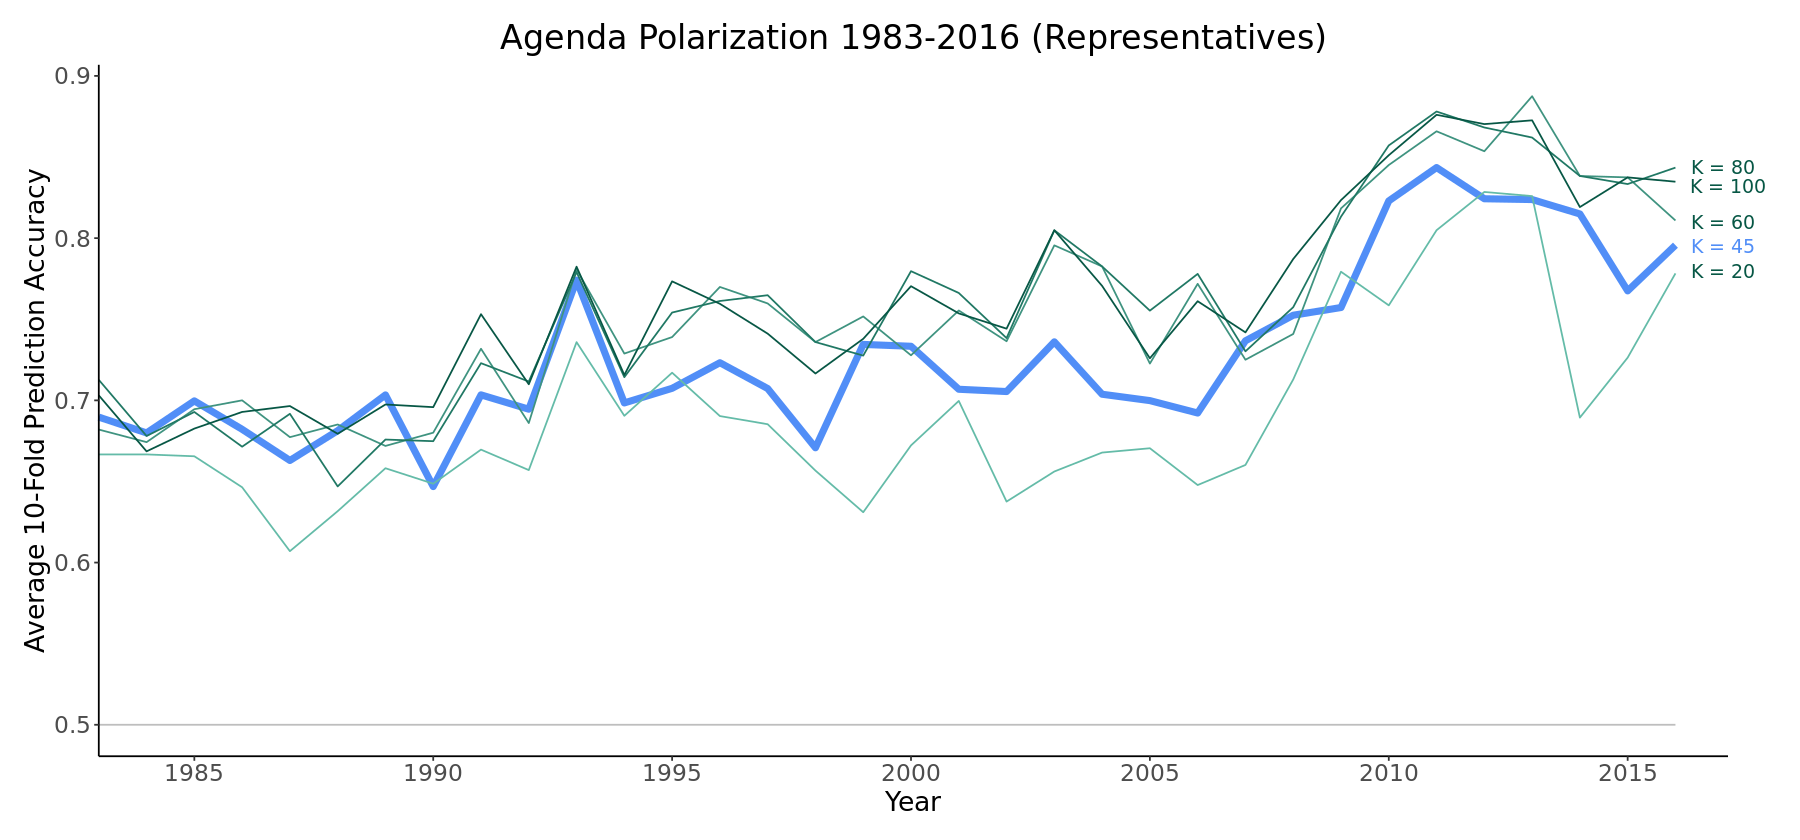

In [114]:
p <- mods %>%
    mutate(k = case_when(k == 45 ~ "k = 45",
                         k == 20 ~ 'k = 20',
                         k == 60 ~ 'k = 60',
                         k == 80 ~ 'k = 80',
                         k == 100 ~ 'k = 100'),
           k = factor(k,levels=c('k = 20','k = 45','k = 60','k = 80','k = 100')),
          type=ifelse(k == 'k = 45','a','b')) %>%
    ggplot(aes(x = year, y = speaker_acc, color=k)) + 
    geom_line(aes(size=type)) + 
    annotate('segment',x=1983,xend=2016,y=0.5,yend=0.5,color='grey') +
    plot_theme +
    theme(legend.position = "None") + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    scale_size_manual(values=c(2,0.5)) + 
    scale_color_manual(values=c('#64bba8','#518ef7','#3f9380','#207864','#075745')) + 
    annotate('text',label='K = 45',x=2017,y=0.795,size=4,color='#518ef7') +
    annotate('text',label='K = 20',x=2017,y=0.78,size=4,color='#075745') +
    annotate('text',label='K = 60',x=2017,y=0.81,size=4,color='#075745') +
    annotate('text',label='K = 80',x=2017,y=0.844,size=4,color='#075745') +
    annotate('text',label='K = 100',x=2017.1,y=0.832,size=4,color='#075745') +
    ggtitle('Agenda Polarization 1983-2016 (Representatives)') + 
    xlab('Year') + 
    ylab('Average 10-Fold Prediction Accuracy')

gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave('Results/Figures/Speaker_acc_withDiffK_supp2.5.png',gt,width=15,height=7)


## Consolidation Results

In [2]:
con_df = read.csv('Results/consolidation.csv')

In [27]:
p = con_df %>%
    select(year,D_mean,R_mean) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'Mean') %>%
    ggplot(aes(x = year, y=Mean, color=Party)) +
    geom_line(size=2) + 
    plot_theme + 
    theme(legend.position = 'None') + 
    scale_color_manual(values=c('blue','red')) + 
    ylab('Average 1 - JS Divergence') + 
    ggtitle('Legislator Agenda Similarity 1983-2016') + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    ylim(0.3,0.6)

ggsave('Results/Figures/consolidation_mean_fig2.3.png',p,width=15,height=7)


In [28]:
p = con_df %>%
    select(year,D_std,R_std) %>%
    pivot_longer(!year,names_to = 'Party',values_to = 'std') %>%
    ggplot(aes(x = year, y=std, color=Party)) +
    geom_line(size=2) + 
    plot_theme + 
    theme(legend.position = 'None') + 
    scale_color_manual(values=c('blue','red')) + 
    ylab('Standard Deviation 1 - JS Divergence') + 
    ggtitle('Legislator Agenda Similarity 1983-2016') + 
    scale_x_continuous(expand = c(0,0),breaks = seq(1980,2020,by=5)) + 
    ylim(0.1,0.2)

ggsave('Results/Figures/consolidation_std_fig2.3.png',p,width=15,height=7)
